In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Dataset
> Speed (*ft/sec*) vs Stoping Distance (*ft*)

In [2]:
cars = pd.read_csv('./dataset/cars.csv')
cars.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


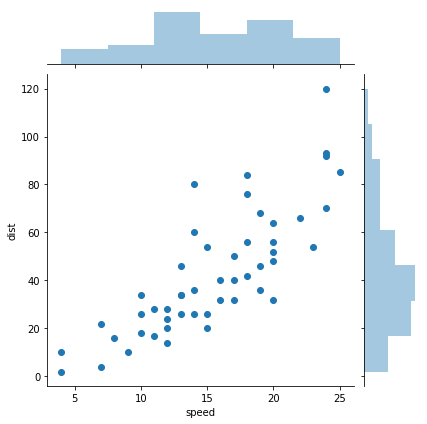

In [3]:
sns.jointplot('speed','dist',data=cars)
plt.show()

### Linear Regression

In [6]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [7]:
model= smf.ols('dist~speed',data=cars).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Tue, 15 Jan 2019   Prob (F-statistic):           1.49e-12
Time:                        01:13:20   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
model.params

Intercept   -17.579095
speed         3.932409
dtype: float64

### Equation of Simple linear regression
$ y = Intercept + speed *  X $

$y <- dist$

$X <- speed$

In [12]:
y_pred = model.params[0] + model.params[1] * cars['speed']

In [14]:
cars['dist_pred'] = y_pred

In [15]:
cars.head()

,speed,dist,dist_pred
0,4,2,-1.849460
1,4,10,-1.849460
2,7,4,9.947766
3,7,22,9.947766
4,8,16,13.880175


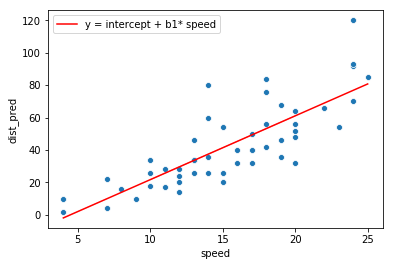

In [23]:
sns.scatterplot('speed','dist',data=cars)
sns.lineplot('speed','dist_pred',data=cars,color='r')
plt.legend(['y = intercept + b1* speed'])
plt.show()

### Quadratic Model
$dist = b * speed^2$

In [31]:
cars['speed2'] = cars['speed']**2
cars.head()

,speed,dist,dist_pred,dist_pred_2,speed**2,speed2
0,4,2,-1.849460,51.847293,16,16
1,4,10,-1.849460,51.847293,16,16
2,7,4,9.947766,158.782336,49,49
3,7,22,9.947766,158.782336,49,49
4,8,16,13.880175,207.389173,64,64


In [32]:
model_2= smf.ols('dist~speed2',data=cars).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     95.67
Date:                Tue, 15 Jan 2019   Prob (F-statistic):           5.20e-13
Time:                        02:42:01   Log-Likelihood:                -205.49
No. Observations:                  50   AIC:                             415.0
Df Residuals:                      48   BIC:                             418.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8600      4.086      2.168      0.035       0.644      17.076
speed2         0.1290      0.013      9.781      0.000       0.102       0.155
==============================================================================
Omnibus:                       11.680   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.759
Skew:                           1.021   Prob(JB):                      0.00280
Kurtosis:                       4.213   Cond. No.                         595.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
y_pred_2 = model_2.params[0]*0 + model_2.params[1] * cars['speed']**2

In [34]:
cars['dist_pred_2']= y_pred_2
cars.head()

,speed,dist,dist_pred,dist_pred_2,speed**2,speed2
0,4,2,-1.849460,2.063499,16,16
1,4,10,-1.849460,2.063499,16,16
2,7,4,9.947766,6.319465,49,49
3,7,22,9.947766,6.319465,49,49
4,8,16,13.880175,8.253995,64,64


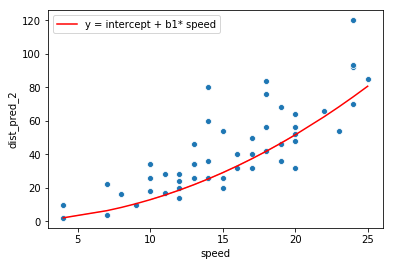

In [40]:
sns.scatterplot('speed','dist',data=cars)
sns.lineplot('speed','dist_pred_2',data=cars,color='r')
plt.legend(['y = intercept + b1* speed'])
plt.show()